In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

import keras.backend as K

2024-10-31 10:31:41.196931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Setting up and training a Neural Network for the XOR data

## Aim
To learn the basic notation for implementing multi-layer artificial Neural Networks using Keras/TensorFlow. The function in this case fitting the XOR data

In [2]:
data_in = np.array([[1,1],[-1,1],[1,-1],[-1,-1]])
data_out = np.array([0,1,1,0])

In [3]:
tf.keras.backend.clear_session()

In [4]:
# Initialise model: 2-2-1
hiddenlayerdepth = 2
model = Sequential([
    Dense(hiddenlayerdepth, activation='tanh', input_shape=(2,)),
    Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

2024-10-31 10:31:47.299209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# fit the model with the data and save the information about the training
history = model.fit(
    data_in,
    data_out,
    epochs=5000,
    verbose=0
)

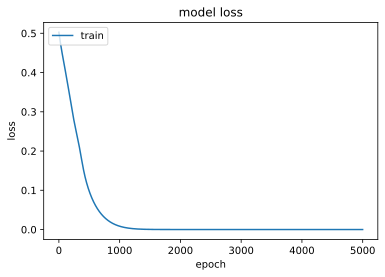

In [6]:
# now we can plot the history to see how the loss function for the
# training and validation set changed with epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [7]:
print(model.predict(data_in))

1/1 [==============================] - 0s 97ms/step
[[8.9406967e-08]
 [1.0000000e+00]
 [9.9999988e-01]
 [1.4901161e-07]]


In [8]:
npts = 100
xpts = np.linspace(-2,2,npts)
ypts = xpts

xygrids = np.meshgrid(xpts,ypts)

In [9]:
z = [];
for i in range(npts):
    for j in range(npts):
        z.append([xygrids[0][i][j],xygrids[1][i][j]])

In [10]:
zvals = (model.predict(np.array(z)))[:,0]

313/313 [==============================] - 0s 1ms/step


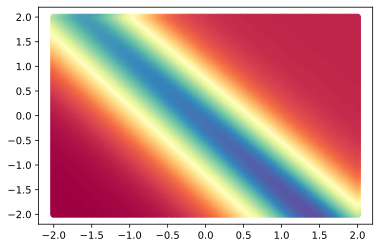

In [11]:
plt.scatter(xygrids[0], xygrids[1], c=zvals, cmap=plt.cm.Spectral)

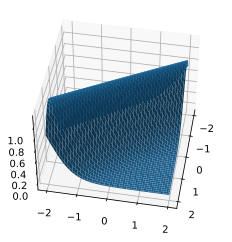

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xygrids[0], xygrids[1], zvals.reshape(xygrids[0].shape))
ax.view_init(45,10)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [14]:
for layer in model.layers:
    print("layer" ,layer.name)
    for weight in layer.weights:
        print("variable" , {weight.name}, {weight.shape})
        print(f"{weight.numpy()}\n")

layer dense
variable {'dense/kernel:0'} {TensorShape([2, 2])}
[[-1.283001   -1.6254756 ]
 [-0.91693234 -1.2562151 ]]

variable {'dense/bias:0'} {TensorShape([2])}
[-0.773546   0.7434797]

layer dense_1
variable {'dense_1/kernel:0'} {TensorShape([2, 1])}
[[-0.91567326]
 [ 0.8759711 ]]

variable {'dense_1/bias:0'} {TensorShape([1])}
[-0.05893287]

